In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from nltk.stem import PorterStemmer

In [73]:
df = pd.read_csv("english_news_category.csv")
df.head(1)

,headline,description,category,source,url
0,Five-star Rabada reduces Bangladesh to 137-8 a...,South Africa fast bowler Kagiso Rabada wreaked...,Sports,prothomalo,https://en.prothomalo.com/sports/cricket/wbifh...


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headline     295 non-null    object
 1   description  295 non-null    object
 2   category     295 non-null    object
 3   source       295 non-null    object
 4   url          295 non-null    object
dtypes: object(5)
memory usage: 11.7+ KB


In [75]:
def upper_to_lower(text):
    return text.lower()

In [76]:
df["description"] = df["description"].apply(upper_to_lower)

In [77]:
df.head()

,headline,description,category,source,url
0,Five-star Rabada reduces Bangladesh to 137-8 a...,south africa fast bowler kagiso rabada wreaked...,Sports,prothomalo,https://en.prothomalo.com/sports/cricket/wbifh...
1,De Zorzi out for 177 as S Africa power to 413-...,tony de zorzi’s commanding innings ended on 17...,Sports,prothomalo,https://en.prothomalo.com/sports/cricket/d3ec0...
2,"Decision on Shakib’s future, Najmul’s captainc...",is najmul hossain really giving up the captain...,Sports,prothomalo,https://en.prothomalo.com/sports/cricket/wtsyd...
3,"De Zorzi, Stubbs tons steer S Africa to 307/2 ...",both men made their maiden test hundreds in a ...,Sports,prothomalo,https://en.prothomalo.com/sports/cricket/tc6ju...
4,De Zorzi steers S. Africa to 109-1 at lunch ag...,captain aiden markram was the only wicket to f...,Sports,prothomalo,https://en.prothomalo.com/sports/cricket/x4sh9...


In [78]:
category =  df['category'].unique()
category

array(['Sports', 'Politics', 'science', 'Business', 'International'],
      dtype=object)

In [79]:
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [80]:
for i,j in(enumerate(le.classes_)):
    print(i, "---", j)

0 --- Business
1 --- International
2 --- Politics
3 --- Sports
4 --- science


In [81]:
df.head(2)

,headline,description,category,source,url
0,Five-star Rabada reduces Bangladesh to 137-8 a...,south africa fast bowler kagiso rabada wreaked...,3,prothomalo,https://en.prothomalo.com/sports/cricket/wbifh...
1,De Zorzi out for 177 as S Africa power to 413-...,tony de zorzi’s commanding innings ended on 17...,3,prothomalo,https://en.prothomalo.com/sports/cricket/d3ec0...


In [82]:
X = df['description']
y = df['category']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

In [85]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [86]:
accuracy = naive_bayes_model.score(X_test, y_test)
print(f"Model Accuracy: {(round(accuracy*100))}%")

Model Accuracy: 83%


In [87]:
def predict_news_category(news_text):
    print(f"Given news is '{str(le.inverse_transform(naive_bayes_model.predict(count_vectorizer.transform(news_text))))}' a news")

In [88]:
custom_news_text = ['Dr Yunus to hold dialogue with some parties today']
predict_news_category(custom_news_text)


Given news is '['Politics']' a news


In [89]:
y_pred = naive_bayes_model.predict(X_test)

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[11,  3,  1,  0,  0],
       [ 0, 14,  1,  0,  1],
       [ 1,  1,  7,  0,  0],
       [ 0,  1,  0, 10,  0],
       [ 0,  0,  0,  1,  7]])

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.74      0.88      0.80        16
           2       0.78      0.78      0.78         9
           3       0.91      0.91      0.91        11
           4       0.88      0.88      0.88         8

    accuracy                           0.83        59
   macro avg       0.84      0.83      0.84        59
weighted avg       0.84      0.83      0.83        59



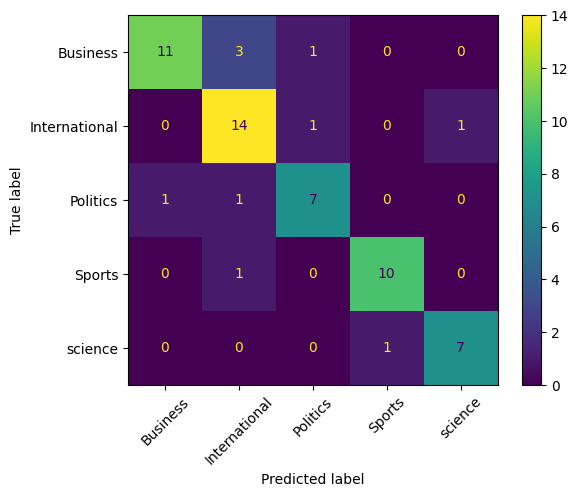

In [92]:
diplay_cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
diplay_cm.plot(xticks_rotation=45)